<hr>
<center>
   <font size='4'> <B> Desafio: </B> BMD é uma empresa vende bermudas e está buscando aumentar suas vendas. Ela nos fornece uma base de dados e deseja saber o que pode fazer para melhorar nesse quesito. </font> <br>
    <br>
    <font size='3'> <I> <B> Análise feita por: </B> Yasmin de Miranda Nobre </I> </font> <br>
    <br>
    <font size='3'> <I> <B> Base de dados por: </B> Hasthag Programação </I> </font>
</center> 
<hr>


## 1) Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

In [2]:
base = pd.read_excel("Vendas.xlsx")

## 2) Análise exploratória da base de dados

In [3]:
base.head() #visualizando as 5 primeiras observações da base de dados

,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585


A fim de tornar a análise mais simples, iremos mudar os nomes das variáveis:

In [4]:
base.columns=['data',"id",'produto','qtd','v_u','v_f']
base.head()

,data,id,produto,qtd,v_u,v_f
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585


Legenda da Base de Dados: <br>
1. <I> data </I>: Dia da venda <br>
   <br>
2. <I> id </I>: Identificação da loja onde ocorreu a venda <br>
    <br>
3. <I> produto </I>: Produto que foi vendido <br>
   <br>
4. <I> qtd </I>: Quantidade do produto que foi vendida <br>
    <br>
5. <I> v_u </I>: Valor unitário, em reais, do produto que está sendo vendido <br>
    <br>
6. <I> v_f </I>: Valor final (total), em reais, da venda. Considera a quantidade de produtos que foram vendidos e multiplica pelo seu valor unitário. Ao longo da análise pode ser referido como "valor da venda" <br>

### 2.1) Analisando valor acumulado das vendas (valor final)

C:\Users\yasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


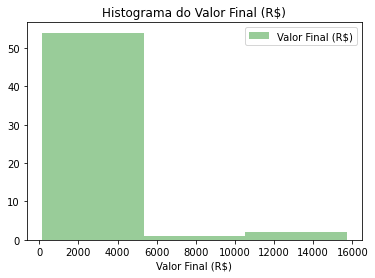

In [5]:
sns.distplot(base['v_f'], bins=3, 
             axlabel="Valor Final (R\$)", 
             color="green",
             label = "Valor Final (R\$)",kde=False)

plt.title("Histograma do Valor Final (R\$)")
plt.legend()

In [6]:
base['v_f'].describe() 

count       57.000000
mean       980.614035
std       2757.203926
min        150.000000
25%        163.000000
50%        310.000000
75%        600.000000
max      15700.000000
Name: v_f, dtype: float64

<B> Comentários </B>: <br>
<br>    
A partir do comando 'describe' notamos que 57 vendas foram observadas. Nesse conjunto de dados notamos que um cliente aleatório inviste em média $R\$980$ reais na BMD.

Entretanto, como notamos no histograma apresentado e nas medidas 'std' (desvio padrão), 'min' (mínimo) e 'max' (máximo), existe uma grande variação no valor final de uma venda: Houveram clientes cujas compras somaram valores relativamente baixos, como $R\$150$, e outros cujo investimento total foi de quase $R\$16.000$. 

Entretanto, a maior parte dos clientes tendem a gastar "pouco", ou seja, até 5 mil reais na empresa. Percebemos pelo gráfico que em poucas vezes o valor final foi maior que este número. 

## 2.2) Analisando pelo período em que ocorreram as vendas

In [7]:
base['data'].describe()

<ipython-input-7-0413363f52c3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  base['data'].describe()


count                      57
unique                     24
top       2019-12-01 00:00:00
freq                        5
first     2019-12-01 00:00:00
last      2019-12-26 00:00:00
Name: data, dtype: object

Como as datas estão no tipo "aaaa-mm-dd" e sabemos que todas as vendas ocorreram em dezembro de 2019, a analise será feita com a distinção dos dias do mês e dias da semana. Assim:

In [8]:
v_data = list()
for i in range(len(base)):
    v_data.append(base['data'][i].strftime("%d"))
    i = i+1

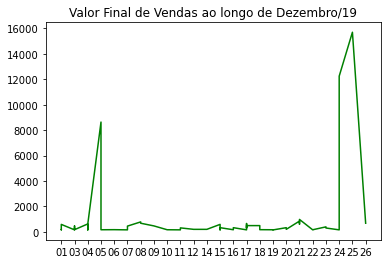

In [10]:
plt.plot(v_data,base['v_f'], color="green")
plt.title("Valor Final de Vendas ao longo de Dezembro/19")
plt.show()

<B> Comentários </B>: <br>
<br>    
É possível perceber que o maior valor final das vendas (quantidade de produtos * valor unitário do produto) ocorreu no dias 25, sendo maior que $R\$14.000$. Como nesse dia comemoramos o Natal e muitas pessoas compram seu presente na "última hora", faz sentido o aumento exponencial deste indicador.

É importante observar, entretanto, que durante a maior parte do tempo, ou seja, entre os dias 05 e 23, o valor final das vendas foi constantemente baixo: abaixo de $R\$2.000$.

No gráfico abaixo vemos que a quantidade de produtos vendidos no dia teve comportamento identico ao do valor final das vendas. Essa situação faz sentido, visto que o valor final das vendas aumenta conforme a quantidade de produtos vendidos aumenta. Com

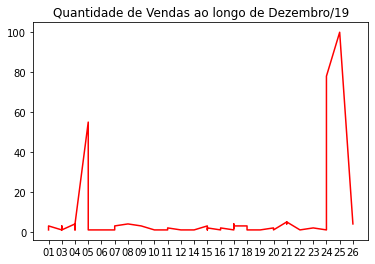

In [11]:
plt.plot(v_data,base['qtd'], color="red")
plt.title("Quantidade de Vendas ao longo de Dezembro/19")
plt.show()

<B> Comentários </B>: <br>
<br>    
No gráfico acima vemos que a quantidade de produtos vendidos no dia teve comportamento identico ao do valor final das vendas. Essa situação faz sentido, visto que o valor final das vendas aumenta conforme a quantidade de produtos vendidos aumenta. Notamos essa relação no gráfico de dispersão abaixo, o qual, por sua vez, sugere que o valor final da venda pode ser modelado por meio de uma regressão linear simples que parta da origem.

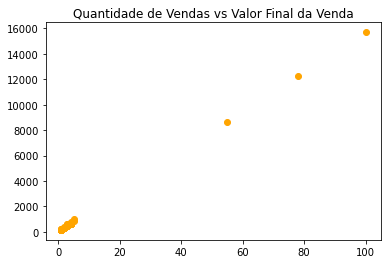

In [12]:
plt.scatter(base['qtd'],base['v_f'], color="orange")
plt.title("Quantidade de Vendas vs Valor Final da Venda")
plt.show()

In [13]:
v_dias = list()
for i in range(len(base)):
    v_dias.append(base['data'][i].strftime("%A"))
    i = i+1

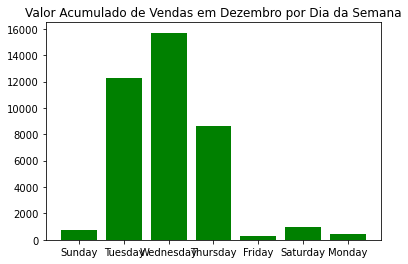

In [14]:
plt.bar(v_dias,base['v_f'], color="green")
plt.title("Valor Acumulado de Vendas em Dezembro por Dia da Semana")
plt.show()

<B> Comentários </B>: <br>
<br>    
No gráfico acima notamos que o dia da semana em que houve maior valor acumulado de vendas foi na Quarta-Feira ("Wednesday"), o dia do Natal daquele ano, seguido da Terça-Feira. Curiosamente, o dia que arrecadou o menor valor foi na Sexta, com menos de $R\$2.000$ vendidos ao longo do mês. Visualmente, há indicios de que na sexta ocorre a venda final média, cujo investimento é de $R\$950$.

Diante disso os gerentes das lojas poderiam considerar campanhas específicas para aumentar o valor acumulado das vendas durante todo o mês e entre a Sexta-Feira e Segunda-Feira. Além disso, vemos que há maior necessidade de atendimento ao cliente entre Terça-Feira e Quinta-Feira e no dia do Natal. Essas informações podem auxiliar na alocação de seus devidos funcionários.

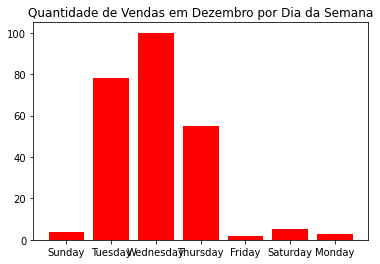

In [15]:
plt.bar(v_dias,base['qtd'], color="red")
plt.title("Quantidade de Vendas em Dezembro por Dia da Semana")
plt.show()

### 2.2) Analisando lojas que estão presentes na base de dados

In [16]:
base['id'].unique() #quais lojas aparecem

array(['Iguatemi Campinas', 'Iguatemi Esplanada', 'Norte Shopping',
       'Bourbon Shopping SP', 'Center Shopping Uberlândia'], dtype=object)

In [17]:
base['id'].value_counts(sort=False) #quantidade de vezes que loja foi observada

Iguatemi Campinas             16
Iguatemi Esplanada             8
Norte Shopping                11
Bourbon Shopping SP           13
Center Shopping Uberlândia     9
Name: id, dtype: int64

Podemos perceber a informação acima de uma maneira melhor, por meio do seguinte gráfico:

In [18]:
freq_L = base['id'].value_counts(sort=False)
freq_lojas = list()
for i in range(len(freq_L)):
    freq_lojas.append(freq_L[i])
    i = i+1

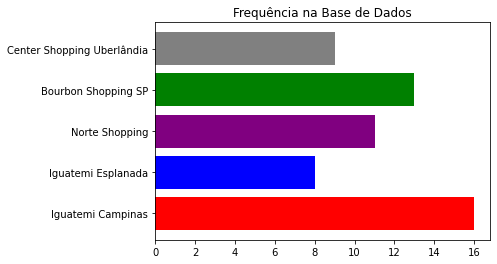

In [19]:
plt.barh(base['id'].unique(),freq_lojas,color=["red","blue","purple","green","gray"])
plt.title("Frequência na Base de Dados")
plt.show()

<B> Comentários </B>: <br>
<br>    
Notamos que a loja presente em 'Iguatemi Esplanada' é a que menos aparece na base de dados. Desse modo, esperamos que essa seja a filial que menos vendeu produtos e que acumulou menos dinheiro ao fim do período observado. Do mesmo modo, como "Iguatemi Campinas" possui maior frequência nas observações, ela terá maior impacto nas medidas que estamos investigando. Para mais detalhe, seria necessário conduzir uma análise de dados específica para cada loja.

Abaixo segue gráfico do Valor Final de vendas que cada loja acumulou. Vemos que "Iguatemi Campinas" de fato possui maior participação na geração de receita de BMD, enquanto a participação das demais são similares. 

Embora "Iguatemi Campinas" tenha sido considerada 16 vezes em nossa amostra, as outras lojas foram entre 8 e 13 vezes, ou seja, esse valor não é tão diferente a ponto de justificar um valor final de vendas acumulado tão baixo para as demais lojas ou tão alto para "Iguatemi Campinas". 

Recomenda-se análise mais profunda do perfil das filiais a ponto de entender o motivo de "Iguatemi Campinas" se destacar.

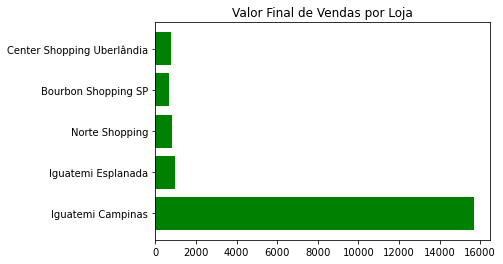

In [20]:
plt.barh(base['id'],base['v_f'], color="green")
plt.title("Valor Final de Vendas por Loja")

plt.show()

### 2.3) Quanto à quantidade de vendas

C:\Users\yasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


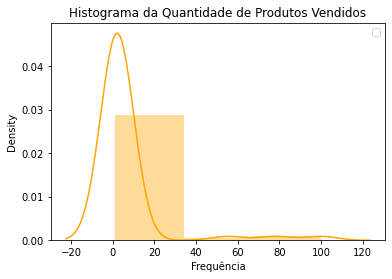

In [21]:
sns.distplot(base['qtd'], bins=3, 
             axlabel="Frequência", 
             color="orange")

plt.title("Histograma da Quantidade de Produtos Vendidos")
plt.legend()

In [22]:
base['qtd'].describe() 

count     57.000000
mean       6.140351
std       17.577826
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      100.000000
Name: qtd, dtype: float64

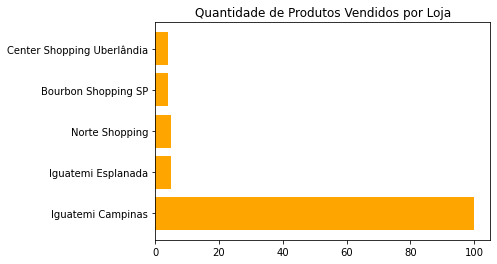

In [23]:
plt.barh(base['id'],base['qtd'], color="orange")
plt.title("Quantidade de Produtos Vendidos por Loja")
plt.show()


In [24]:
from tabulate import tabulate
 
tab = [
    [150, 23],
    [155, 28],
    [157, 233],
    [163, 25],
    [169, 21],
    [195, 20]
]
 
# create header
head = ["Valor Unitário", "Quantidade de Produtos Vendidos"]
 
# display table
print(tabulate(tab, headers=head, tablefmt="grid"))

+------------------+-----------------------------------+
|   Valor Unitário |   Quantidade de Produtos Vendidos |
+==================+===================================+
|              150 |                                23 |
+------------------+-----------------------------------+
|              155 |                                28 |
+------------------+-----------------------------------+
|              157 |                               233 |
+------------------+-----------------------------------+
|              163 |                                25 |
+------------------+-----------------------------------+
|              169 |                                21 |
+------------------+-----------------------------------+
|              195 |                                20 |
+------------------+-----------------------------------+


In [25]:
#sns.set_theme(style="darkgrid")

#sns.countplot(base['produto'])